# Regularized regression

In [120]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [108]:
boston=pd.read_csv("Boston.csv")

In [109]:
x=boston.drop('medv',axis=1)
y=boston['medv']

lr=LinearRegression()
lr.fit(x,y)
print(lr.intercept_)
print(lr.coef_)

36.45948838509025
[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=23)
lr1=LinearRegression()
lr1.fit(x_train,y_train)
y_pred=lr1.predict(x_test)
print(mae(y_test,y_pred))
print(mse(y_test,y_pred))
print(r2_score(y_test,y_pred))

3.782429511205018
25.358577194006944
0.6947991644651352


In [111]:
diamonds = pd.read_csv("Diamonds.csv")

In [112]:
dum_dia=pd.get_dummies(diamonds,drop_first=True)
dia_train,dia_test=train_test_split(dum_dia,test_size=0.3,random_state=23)
x_train=dia_train.drop('price',axis=1)
y_train=dia_train['price']
x_test=dia_test.drop('price',axis=1)
y_test=dia_test['price']
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(r2_score(y_test,y_pred))

0.9191455174725736


# Ridge Regression

In [122]:
diamonds = pd.read_csv("Diamonds.csv")

In [126]:
dum_dia=pd.get_dummies(diamonds,drop_first=True)
dia_train,dia_test=train_test_split(dum_dia,test_size=0.3,random_state=23)
x_train=dia_train.drop('price',axis=1)
y_train=dia_train['price']
x_test=dia_test.drop('price',axis=1)
y_test=dia_test['price']

alphas=[0.01,0.15,0.5,0.75,1,2,2.4,4]
for v in alphas:
    ridge=Ridge()
    ridge.fit(x_train,y_train)
    #print(ridge.coef_)
    y_pred=ridge.predict(x_test)
    scr=r2_score(y_test,y_pred)
    print("Alpha=",v,"R2=",scr)

Alpha= 0.01 R2= 0.9191313060296065
Alpha= 0.15 R2= 0.9191313060296065
Alpha= 0.5 R2= 0.9191313060296065
Alpha= 0.75 R2= 0.9191313060296065
Alpha= 1 R2= 0.9191313060296065
Alpha= 2 R2= 0.9191313060296065
Alpha= 2.4 R2= 0.9191313060296065
Alpha= 4 R2= 0.9191313060296065


In [113]:
salari = pd.read_csv("Salaries.csv")

In [114]:
dum_sal=pd.get_dummies(salari,drop_first=True)
sal_train,sal_test=train_test_split(dum_sal,test_size=0.3,random_state=23)
x_train=sal_train.drop('salary',axis=1)
y_train=sal_train['salary']
x_test=sal_test.drop('salary',axis=1)
y_test=sal_test['salary']
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(r2_score(y_test,y_pred))

0.3639884340881161


In [115]:
boston=pd.read_csv("Boston.csv")

In [116]:
dum_bs=pd.get_dummies(boston,drop_first=True)
bs_train,bs_test=train_test_split(dum_bs,test_size=0.3,random_state=23)
x_train=bs_train.drop('medv',axis=1)
y_train=bs_train['medv']
x_test=bs_test.drop('medv',axis=1)
y_test=bs_test['medv']

alphas=[0.01,0.15,0.5,0.75,1,2,2.4,4]
for v in alphas:
    ridge=Ridge()
    ridge.fit(x_train,y_train)
    #print(ridge.coef_)
    y_pred=ridge.predict(x_test)
    scr=r2_score(y_test,y_pred)
    print("Alpha=",v,"R2=",scr)

Alpha= 0.01 R2= 0.6913170388069763
Alpha= 0.15 R2= 0.6913170388069763
Alpha= 0.5 R2= 0.6913170388069763
Alpha= 0.75 R2= 0.6913170388069763
Alpha= 1 R2= 0.6913170388069763
Alpha= 2 R2= 0.6913170388069763
Alpha= 2.4 R2= 0.6913170388069763
Alpha= 4 R2= 0.6913170388069763


In [117]:
salari = pd.read_csv("Salaries.csv")

In [118]:
dum_sal=pd.get_dummies(salari,drop_first=True)
sal_train,sal_test=train_test_split(dum_sal,test_size=0.3,random_state=23)
x_train=sal_train.drop('salary',axis=1)
y_train=sal_train['salary']
x_test=sal_test.drop('salary',axis=1)
y_test=sal_test['salary']
alphas=np.linspace(0.001,15,20)#[0.01,0.15,0.5,0.75,1,2,2.4,4]
scores=[]
for v in alphas:
    ridge=Ridge(alpha=v)
    ridge.fit(x_train,y_train)
    #print(ridge.coef_)
    y_pred=ridge.predict(x_test)
    scr=r2_score(y_test,y_pred)
    scores.append(scr)
    #print("Alpha=",v,"R2=",scr)
i_max=np.argmax(scores)
print("Best alpha=",alphas[i_max])
print("Best score=",scores[i_max])


Best alpha= 9.474052631578948
Best score= 0.37072913330268276


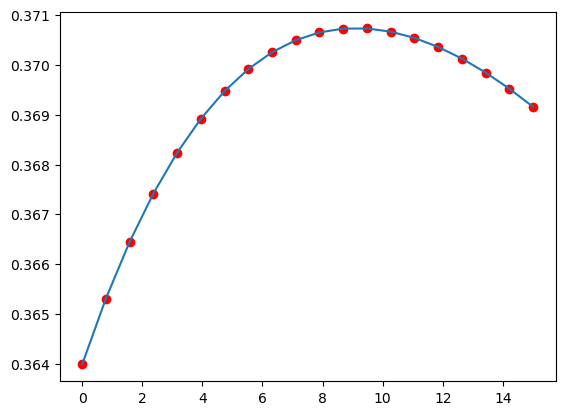

In [102]:
plt.plot(alphas,scores)
plt.scatter(alphas,scores,c='red')
plt.show()

# Lasso Regression

In [106]:
dum_sal=pd.get_dummies(salari,drop_first=True)
sal_train,sal_test=train_test_split(dum_sal,test_size=0.3,random_state=23)
x_train=sal_train.drop('salary',axis=1)
y_train=sal_train['salary']
x_test=sal_test.drop('salary',axis=1)
y_test=sal_test['salary']
alphas=np.linspace(0.001,15,20)#[0.01,0.15,0.5,0.75,1,2,2.4,4]
scores=[]
for v in alphas:
    lasso=Lasso(alpha=v)
    lasso.fit(x_train,y_train)
    #print(ridge.coef_)
    y_pred=ridge.predict(x_test)
    scr=r2_score(y_test,y_pred)
    scores.append(scr)
    #print("Alpha=",v,"R2=",scr)
i_max=np.argmax(scores)
print("Best alpha=",alphas[i_max])
print("Best score=",scores[i_max])


Best alpha= 0.001
Best score= 0.3691577381153066


# ElasticNet

In [105]:
dum_sal=pd.get_dummies(salari,drop_first=True)
sal_train,sal_test=train_test_split(dum_sal,test_size=0.3,random_state=23)
x_train=sal_train.drop('salary',axis=1)
y_train=sal_train['salary']
x_test=sal_test.drop('salary',axis=1)
y_test=sal_test['salary']
alphas=[0.001,0.1,0.5,1,2]
l1_s=[0.001,0.25,0.75]
scores=[]
params=[]
for v in alphas:
    for l1 in l1_s:
        elast=ElasticNet(alpha=v,l1_ratio=l1)
        elast.fit(x_train,y_train)
        #print(ridge.coef_)
        y_pred=elast.predict(x_test)
        scr=r2_score(y_test,y_pred)
        params.append({'alpha':v,'L1_ratio':l1})
        scores.append(scr)
        #print("Alpha=",v,"R2=",scr)
    
i_max=np.argmax(scores)
print("Best alpha=",params[i_max])
print("Best score=",scores[i_max])


Best alpha= {'alpha': 0.1, 'L1_ratio': 0.75}
Best score= 0.37044748848850784


# k-Fold

In [129]:
boston = pd.read_csv("Boston.csv")
x = boston.drop('medv',axis=1)
y=boston["medv"]

kfold = KFold(n_splits=5, shuffle=True,random_state=23)

alphas = np.linspace(0.001,15,20)
l1_s = np.linspace(0,1,10)

score = []
param = []

for v in alphas:
    for l1 in l1_s:
        elast = ElasticNet(alpha=v, l1_ratio=l1)
        result = cross_val_score(elast,x,y,cv=kfold)
        scr = np.mean(result)
        score.append(scr)
        param.append({'alpha' :v, 'l1_ratio' : l1})
    
i_max = np.argmax(score)#return index of max value
print(f"Best alpha = {param[i_max]} \nBest score = {score[i_max]}")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.512e+03, tolerance: 3.393e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.600e+03, tolerance: 3.591e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

Best alpha = {'alpha': 0.001, 'l1_ratio': 0.7777777777777777} 
Best score = 0.7186437570680854
